## Time Series Data

In [1]:
import pandas as pd

from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [2]:
df = data.sf_temps()

In [3]:
df = df.set_index('date').sort_index()

In [4]:
df.head(10)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
2010-01-01 05:00:00,45.8
2010-01-01 06:00:00,45.9
2010-01-01 07:00:00,45.9
2010-01-01 08:00:00,46.4


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
df.resample('D').mean() # daily

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [6]:
dfavg = df.resample('D').mean()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

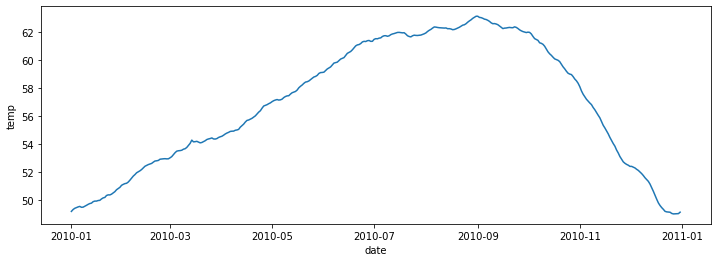

In [8]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfavg , x=dfavg.index, y='temp')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
df.index.min(), df.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

In [10]:
dfmin = df.index.min()

In [11]:
#2 min temp over time
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmin = df.resample('D').min()

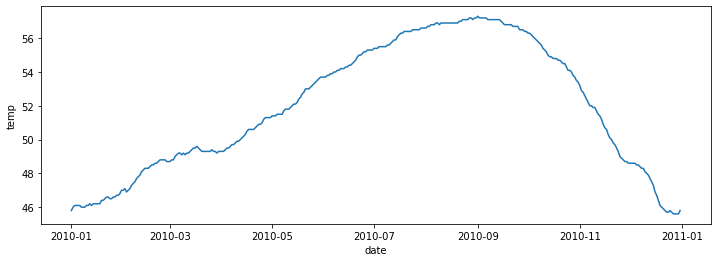

In [12]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfmin , x=dfmin.index, y='temp')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [13]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmax = df.resample('D').max()

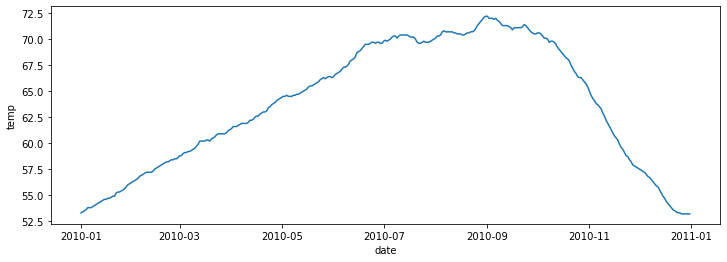

In [14]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfmax , x=dfmax.index, y='temp')
plt.show()

### 4. Which month is the coldest, on average?

In [15]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfmin = df.resample('M').mean()

In [16]:
dfmin.loc[dfmin['temp']== dfmin.temp.min()]

# January has highest avg temp

,temp
date,
2010-01-31,49.98414


### 5. Which month has the highest average temperature?

In [17]:
dfmin.loc[dfmin['temp']== dfmin.temp.max()]

# September has highest avg temp

,temp
date,
2010-09-30,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
dfminmax = df.temp.resample('D').agg(['min','max'])

In [19]:
dfminmax['dif'] = dfminmax['max'] - dfminmax['min']

In [20]:
dfminmax = dfminmax.resample('M').mean()

In [21]:
dfminmax.loc[dfminmax['dif']== dfminmax.dif.max()]

,min,max,dif
date,,,
2010-09-30,56.903333,71.306667,14.403333


# pg break

In [22]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [23]:
df = data.seattle_weather()
df = df.set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### Which year and month combination has the highest amount of precipitation?

In [24]:
df = df.resample('M').sum()

In [25]:
df.loc[df['precipitation']== df.precipitation.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


In [26]:
# December has the highest amount of precipitation

### Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

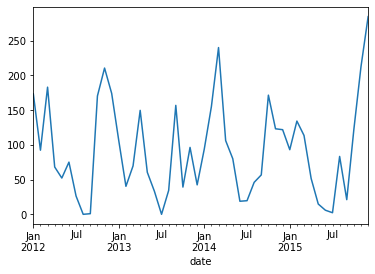

In [27]:
df.precipitation.plot()

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

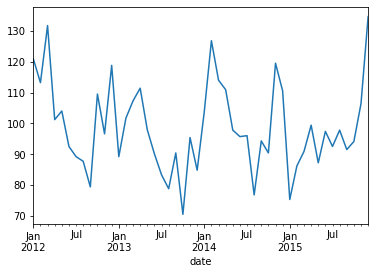

In [28]:
df.wind.plot()

### Which year-month combination is the windiest?

In [29]:
df = data.seattle_weather()

df = df.set_index('date')

df = df.resample('M').mean()

df.loc[df['wind']== df.wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


In [30]:
# Feb 2014 was the windiest

### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [31]:
df = data.seattle_weather()
df = df.set_index('date')
df.loc[df['weather']== 'sun', 'has_sun'] = True
df.has_sun = df.has_sun.fillna(False)
df = df.resample('Y').mean()

In [32]:
df.loc[df['has_sun']== df.has_sun.max()]

,precipitation,temp_max,temp_min,wind,has_sun
date,,,,,
2014-12-31,3.377534,16.99589,8.662466,3.387671,0.578082


### In which month does it rain the most?


In [33]:
df = data.seattle_weather()
df = df.set_index('date')
df['month'] = df.index.month

In [34]:
df.groupby('month').precipitation.sum().sort_values(ascending= False)

month
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
2     422.0
4     375.4
9     235.5
5     207.5
8     163.7
6     132.9
7      48.2
Name: precipitation, dtype: float64

### Which month has the most number of days with a non-zero amount of precipitation?

In [35]:
df.loc[df['precipitation'] > 0, 'rain'] = True
df.rain = df.rain.fillna(False)

In [36]:
df.groupby('month').rain.mean().sort_values(ascending= False)


month
12    0.653226
2     0.646018
11    0.591667
3     0.588710
1     0.532258
10    0.491935
4     0.491667
6     0.308333
9     0.291667
5     0.274194
8     0.177419
7     0.088710
Name: rain, dtype: float64

# pg break

In [37]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [38]:
df = data.flights_20k()
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


### Convert any negative delays to 0.

In [39]:
df.loc[df['delay'] < 0, 'delay'] = 0
df = df.fillna(0)

In [40]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
